In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing as prep
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
test=pd.read_csv('C:/Users/aksha/OneDrive/Desktop/EDAL/test.csv')
train=pd.read_csv('C:/Users/aksha/OneDrive/Desktop/EDAL/train.csv')
titanic=pd.read_csv('C:/Users/aksha/OneDrive/Desktop/EDAL/titanic.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Creating the Data Dictionary 
Data_dict = pd.DataFrame(train.dtypes)
Data_dict

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [9]:
train.shape

(891, 12)

In [10]:
#Identifying the missing values from the dtaset
Data_dict['Missingval']=train.isnull().sum()
Data_dict

,0,Missingval
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


In [11]:
#identifying unique values . for this we used nunique

Data_dict['UniqueVal']=train.nunique()
Data_dict

,0,Missingval,UniqueVal
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


In [12]:
#identifying count of the variable
Data_dict['Count']=train.count()
Data_dict

,0,Missingval,UniqueVal,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [13]:
#Renaming the first column using rename 
Data_dict=Data_dict.rename(columns={0:'Datatype'})
Data_dict

,Datatype,Missingval,UniqueVal,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [14]:
#get descriptive statistics on object
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [15]:
# get the descriptive statistics on "number" datatypes
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Windows\Temp\ipykernel_18384\4030819571.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'],kde=True,ax=axes[1,2])
C:\Windows\Temp\ipykernel_18384\4030819571.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=True,ax=axes[1,3])


<Axes: xlabel='Age', ylabel='Density'>

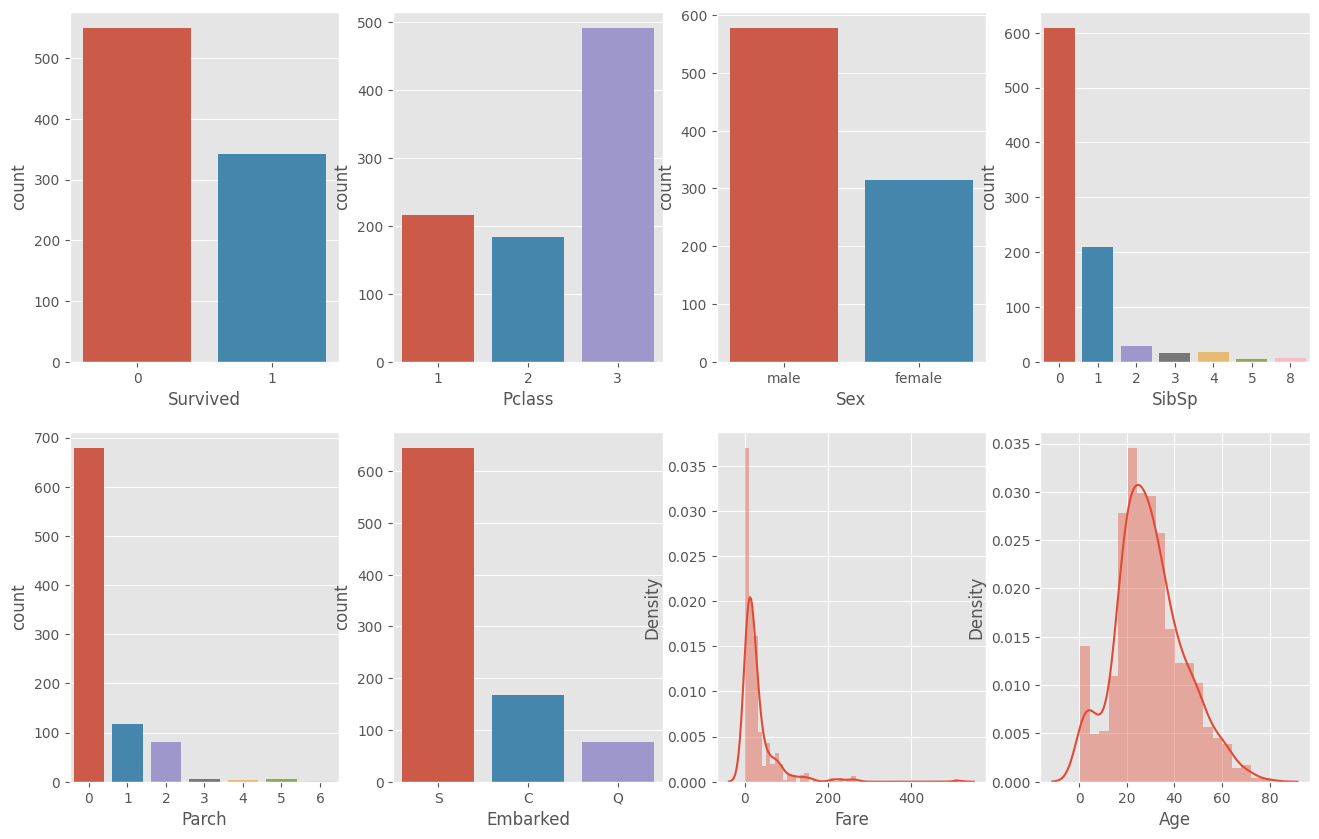

In [16]:
fig, axes = plt.subplots(2,4,figsize=(16,10))
sns.countplot(x ='Survived',data=train,ax=axes[0,0])
sns.countplot(x ='Pclass',data=train,ax=axes[0,1])
sns.countplot(x ='Sex',data=train,ax=axes[0,2])
sns.countplot(x ='SibSp',data=train,ax=axes[0,3])
sns.countplot(x ='Parch',data=train,ax=axes[1,0])
sns.countplot(x ='Embarked',data=train,ax=axes[1,1])
sns.distplot(train['Fare'],kde=True,ax=axes[1,2])
sns.distplot(train['Age'].dropna(),kde=True,ax=axes[1,3])
#plt.show()

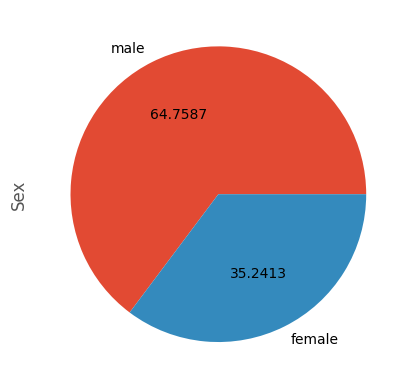

In [17]:
train['Sex'].value_counts().plot(kind='pie' , autopct = "%.4f")
plt.show()

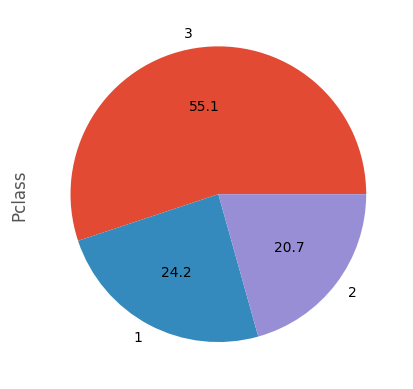

In [18]:
train['Pclass'].value_counts().plot(kind='pie' , autopct = "%.1f")
plt.show()

 Bivariate Data Analysis

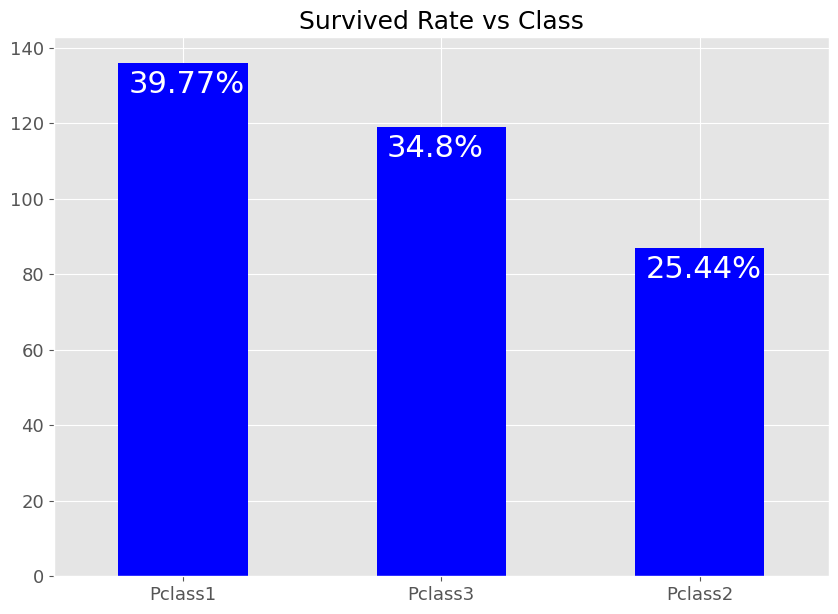

In [19]:
Pclass_survival = train[train.Survived == 1]
Pclass_survival.head()
ax = Pclass_survival.Pclass.value_counts().plot(kind='bar', figsize=(10,7), fontsize=13,color = 'blue');
plt.xticks(np.arange(3), ['Pclass1' , 'Pclass3','Pclass2'] , rotation = 0)
ax.set_alpha(0.8)
ax.set_title(" Survived Rate vs Class " , fontsize = 18)

#create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
total = sum(totals)

# Set individual bar labels using above list
for i in ax.patches:
    # get x_pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04 , i.get_height()-8, \
            str(round((i.get_height()/total)*100,2))+'%', fontsize = 22,
                color='white')


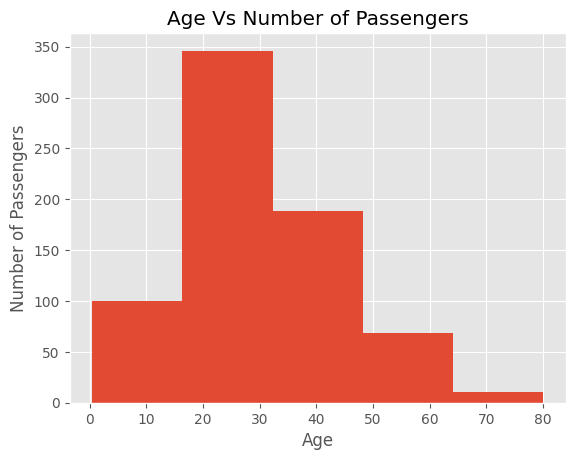

In [20]:
# age analysis
plt.hist(train['Age'],bins=5)
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title("Age Vs Number of Passengers")
plt.show()

C:\Windows\Temp\ipykernel_18384\3999646449.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


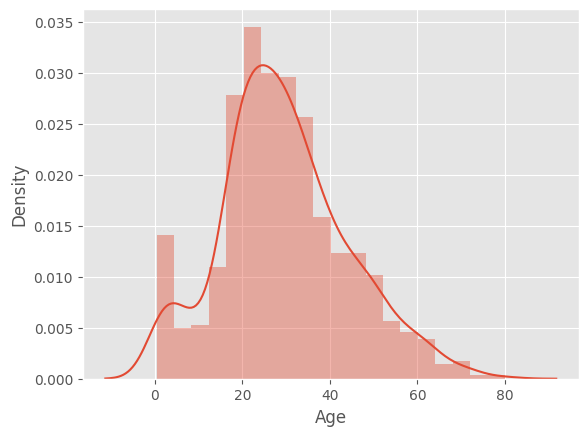

In [21]:
sns.distplot(train['Age'])
plt.show()

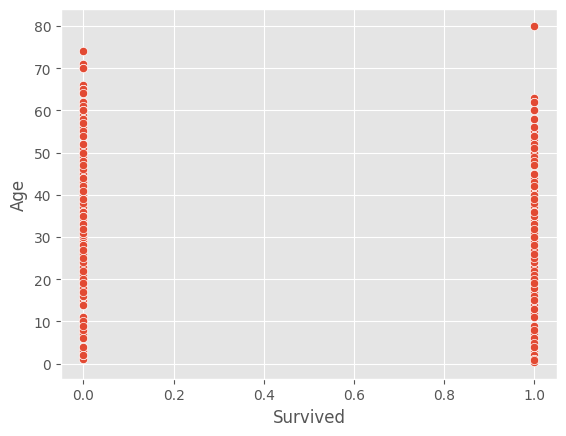

In [22]:
sns.scatterplot(x = train['Survived'],y = train['Age'])
plt.show()

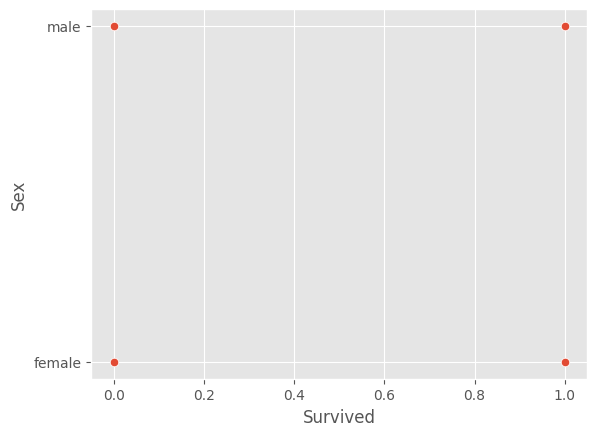

In [23]:
sns.scatterplot(x = train['Survived'],y = train['Sex'])
plt.show()

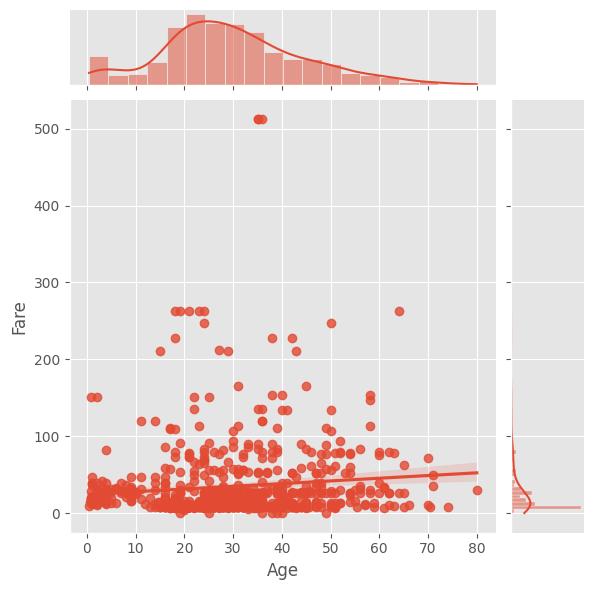

In [24]:
sns.jointplot(x = 'Age' , y = 'Fare' , data = train , kind = 'reg')
plt.show()

C:\Windows\Temp\ipykernel_18384\1582720483.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


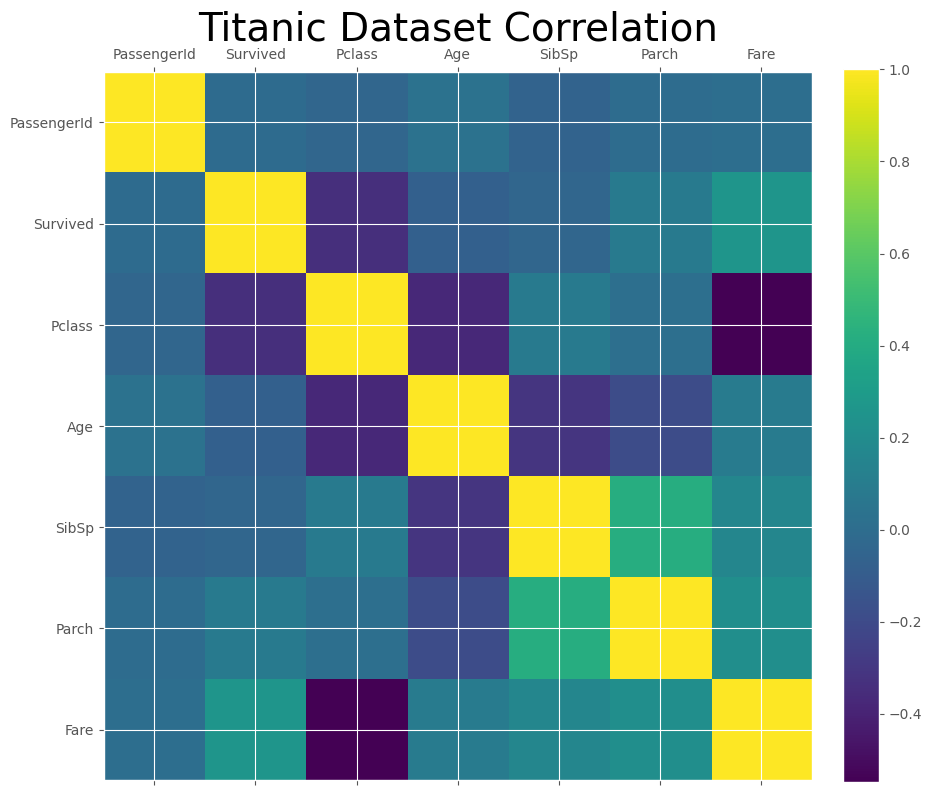

In [31]:
# Multi Variate Analysis
def plotting_corr (train , size = 10):
    corr = train.corr()
    fig , ax =plt.subplots(figsize = (size,size))
    cax = ax.matshow(corr)
    fig.colorbar(cax, fraction=0.046 , pad = 0.04 )
    plt.title('Titanic Dataset Correlation' , fontsize = 28)
    plt.xticks(range(len(corr.columns)) , corr.columns)
    plt.yticks(range(len(corr.columns)) , corr.columns)

plotting_corr(train , size = 10)
plt.show()

In [26]:
titanic_dataset = train.append(test , ignore_index = True)
titanic_dataset.head()

C:\Windows\Temp\ipykernel_18384\1094612831.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  titanic_dataset = train.append(test , ignore_index = True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
titanic_dataset.shape

(1309, 12)

In [28]:
titanic_dataset.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [29]:
le = prep.LabelEncoder()

In [30]:
print(titanic_dataset.Age.unique())
print(titanic_dataset.Age.nunique())
print(titanic_dataset.Cabin.unique())
print(titanic_dataset.Cabin.nunique())
print(titanic_dataset.SibSp.unique())
print(titanic_dataset.SibSp.nunique())

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]
98
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' '